# Model criticism

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import logging
import os

import numpy as np
import edward as ed
import tensorflow as tf
import matplotlib.pyplot as plt

from neural_clustering.criticize import (plot, restore,
                                         store_cluster_assignments, ppc_plot)
from neural_clustering import config

In [2]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 5)

logging.basicConfig(level=logging.INFO)

In [3]:
cfg = config.load('../config.yaml')

**Important**: due to problems with Edward's tensorflow sessions, it is required to restart the kernel when restoring session

In [4]:
exp = restore.experiment(cfg, '28-Nov-2017@17-32-31-GMM')
exp.keys()

dict_keys(['qpi', 'qmu', 'qsigmasq', 'qz', 'x_train', 'params', 'x_pred'])

In [5]:
x_pred = exp['x_pred']
x_train = exp['x_train']

# qpi (mixture proportions) over iterations

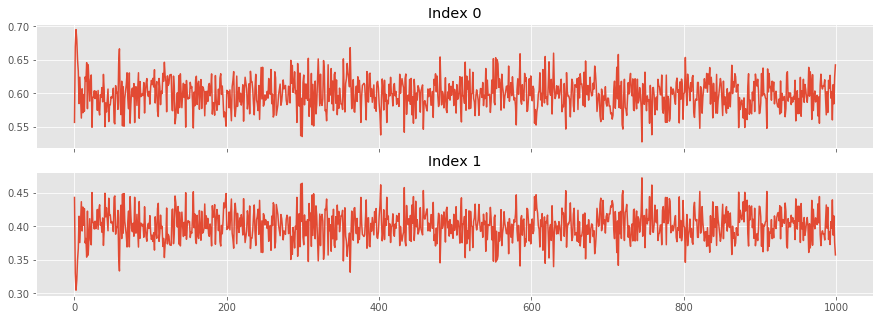

In [6]:
plot.params_over_iterations(exp['qpi'], axis=1)

# qmu (mixture centers) over iterations

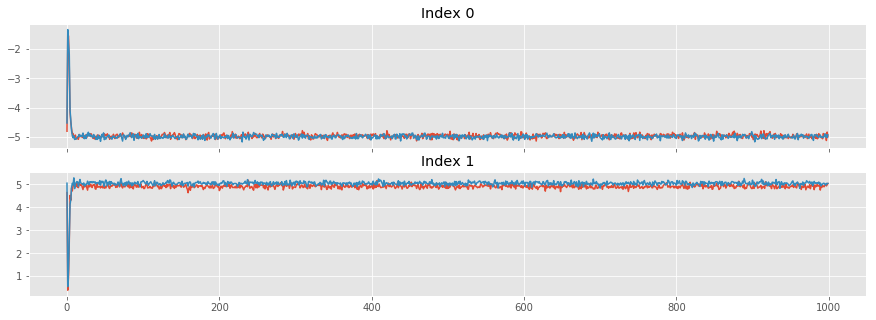

In [7]:
plot.params_over_iterations(exp['qmu'], axis=1)

# Get cluster ssignments, also save them in the sessions folder

In [8]:
clusters = store_cluster_assignments(cfg, exp['x_train'], exp['qmu'], exp['params'])

INFO:neural_clustering.criticize.criticize:Cluster assignmens stored in /Users/Edu/data/neural-clustering-toy/sessions/28-Nov-2017@17-32-31-GMM/clusters.npy


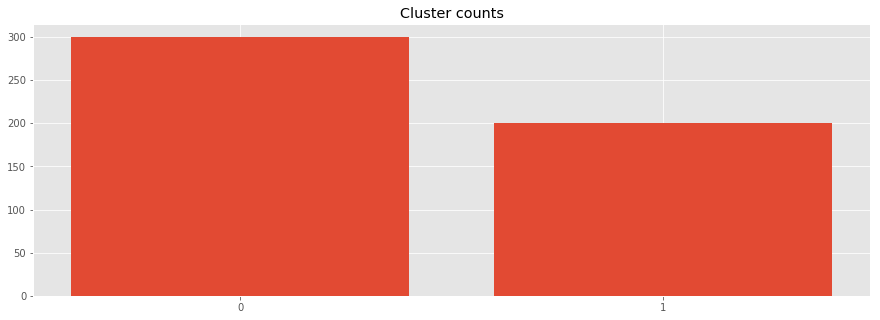

In [9]:
plot.cluster_counts(clusters)

## Log likelihood and mean squared error

In [10]:
log_lik = ed.evaluate('log_likelihood', data={x_pred: x_train})
mse = ed.evaluate('mean_squared_error', data={x_pred: x_train})
print(f'Log likelihood is: {log_lik:0.2f}')
print(f'Mean squared error is: {mse:0.2f}')

Log likelihood is: -12507.70
Mean squared error is: 25.07


## Posterior predictive checks

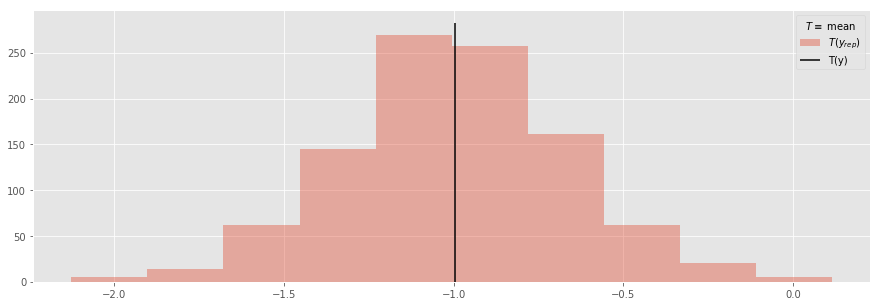

In [11]:
ppc_plot(lambda xs, mus: tf.reduce_mean(xs[x_pred]), 'mean', x_pred, x_train)

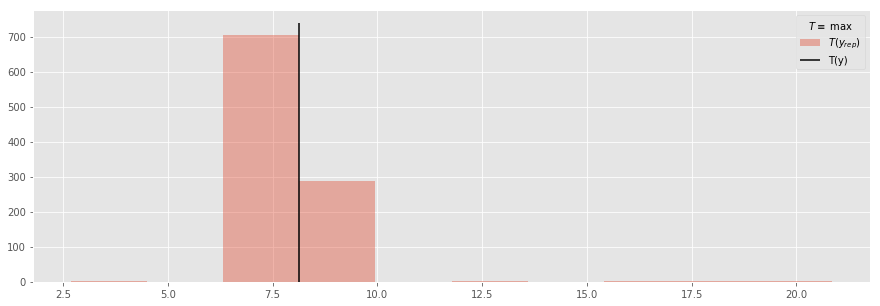

In [12]:
ppc_plot(lambda xs, mus: tf.reduce_max(xs[x_pred]), 'max', x_pred, x_train)

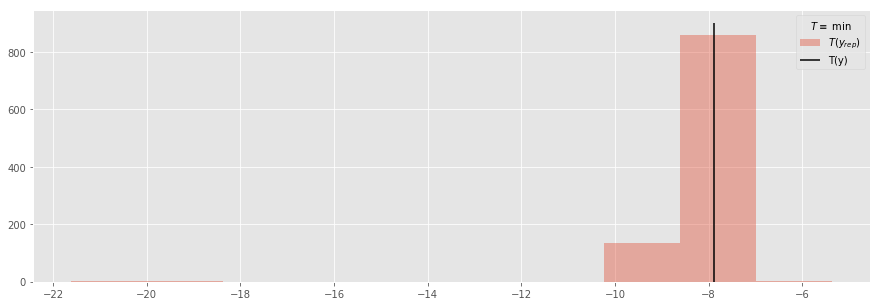

In [13]:
ppc_plot(lambda xs, mus: tf.reduce_min(xs[x_pred]), 'min', x_pred, x_train)